Visualizing Datasets
=============

At the end of the day, any scientific experiment -- either performed in the lab, or _in silico_ -- tends to produce data which is processed and analyzed. Sometimes, this analysis involves [visualizing the data](https://en.wikipedia.org/wiki/Data_visualization). In this lesson, you'll learn how to use Python's ``matplotlib`` package to make some visualizations.

In this lesson, we'll be working with some data derived from a [data set](http://databank.worldbank.org/data/reports.aspx?source=2&series=EN.ATM.CO2E.PC) published by the World Bank on carbon dixoide emissions by country and year, measured in metric tons per capita.



Anatomy of a Matplotlib Figure
==============

Let's take a look at one of the main tools used to do data visualization in Python: [matplotlib](https://matplotlib.org/index.html). ``matplotlib`` is designed to be Python's answer to plotting in ``MATLAB``. For this reason, if you've had to make plots in ``MATLAB``, you might find working with ``matplotlib`` to be somewhat familiar.

Generally speaking, people interact with ``matplotlib`` in one of two ways:

* They import a module, ``matplotlib.pyplot``, which exposes a whole bunch of plotting functions, and allows for more fine-tuned control over aspects of the plot

* They import a module ``pylab``, which itself imports ``matplotlib`` and some other Python packages, to make the generation of plots a bit more like how ``MATLAB`` works.

For the purposes of this lesson, you will be using the former approach, as ``matplotlib.pyplot`` provides a much more rich set of commands with which you can create plots. (For more of a discussion on this point, see this [blog post from DataCamp](https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python).)

Ready to start making some plots?



> The ``matplotlib.pyplot`` ``figure`` object
------------------

The first thing you need to know about making a plot is the ``figure`` object. Think of it like a canvas that an artist paints on - it's a blank slate upon which you can put text, images, etc. The ``figure`` object is the fundamental thing we need to do plotting.

Let's import ``matplotlib.pyplot`` and instantiate a figure. To do so, we first need to import the module. In addition, because we are working in a Jupyter notebook, it's often convenient to tell matplotlib that we want the plots to be rendered "inline" inside the notebook.

In [16]:
#Import matplotlib, and set rendering to be "inline"
import matplotlib.pyplot as plt

%matplotlib inline

#Import numpy for later in the notebook
import numpy as np

Now, we can instantiate a ``figure``.

In [17]:
#Instantiate a figure, and show it
fig = plt.figure()

plt.show()

Hmm...that's interesting! We made a figure, but when we show it, we simply get a memory address! Why is that? Because, since the figure is a _canvas_, and we haven't put anything on it, there's nothing to show! 

> Adding axes to the figure
------------

Having instantiated a ``figure`` object, we can use the ``.add_axes()`` method to put axes on the figure.

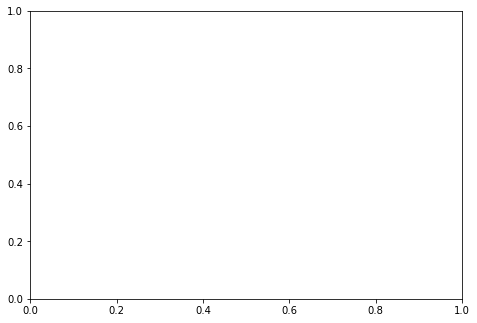

In [18]:
#Instantiate a figure, and add a standard set of axes
fig = plt.figure()

ax = fig.add_axes([0, 0, 1, 1])

plt.show()

The ``add_axes()`` method provides us with a non-trivial degree of control over the figure. For example, suppose we wanted to put two sets of axes. To do so, we call ``add_axes()`` twice.

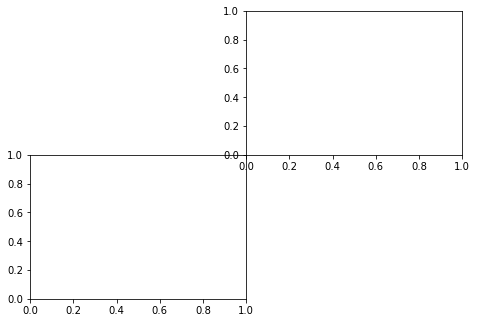

In [19]:
#Instantiate a figure
fig = plt.figure()

#Add an axis for the left half of the figure
ax = fig.add_axes([0, 0, .5, .5])

#Add an axis for the right half of the figure
ax2 = fig.add_axes([.5, .5, .5, .5])


Now that we can add axes to our figures, we can start making some plots!

Some Simple Plots
============

> Line Plot
-----------

One of the most basic -- but useful -- plots is a _line plot_. If we have an ``Axes`` object, we can use its ``plot`` method to plot data. Below, you will take some data about historical US CO2 emissions, and make a line plot.

In [20]:
#Data derived from the World Bank data set

years = [1990, 2000, 2007, 2008, 2009, 2010, 2011, 2012, 2013]

us_emissions = [np.round(float(x), 2) for x in ['19.3233681671961', '20.2076147591466', '19.2374604467856',
       '18.4892337521751', '17.1923671443447', '17.4848031479796',
       '17.0194385160343', '16.28705288144', '16.389757994879']]

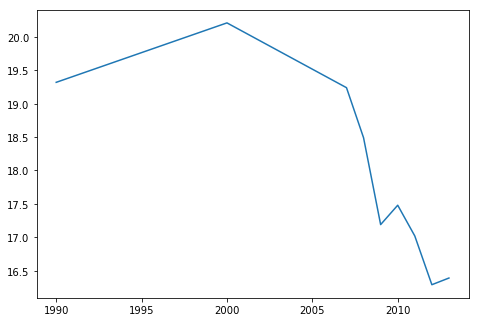

In [21]:
#Instantiate a figure
fig = plt.figure()

#Add an axis
ax = fig.add_axes([0,0,1,1])

#Plot emissions versus years
ax.plot(years, us_emissions)

This is a pretty minimal plot. There are several things we might like to do to it, to make it a bit more legible:

* Put markers at the data points
* Make the line dashed, so that people don't think there's X-values in-between the integers
* Add labels to the x,y-axes
* Add a title

Using the ``plot`` method of an ``Axes`` object, doing so is straightforward! The first two points are accomplished using the ``marker``, ``markersize``, ``linestyle`` keywords, and the last two using other methods built into the ``Axes`` object.

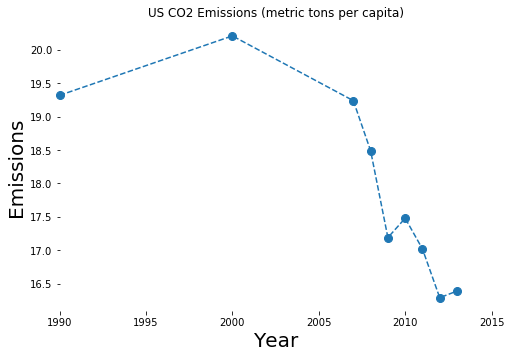

In [22]:
#Draw the minimal figure
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

#Change marker, markersize, and linestyle
ax.plot(years, us_emissions, marker='o', markersize=8, linestyle='--', clip_on=False)

#Add a label to the x-axis
ax.set_xlabel('Year', fontsize=20)

#Add a label to the y-axis
ax.set_ylabel('Emissions', fontsize=20)

#Add a  title
ax.set_title('US CO2 Emissions (metric tons per capita)')

#Adjust x limits for easier viewing
ax.set_xlim([1990, 2015])

#Turn off the frame (the box around the plot)
ax.set_frame_on(False)

> Bar Plot
-----------

To make a bar plot, we use the ``bar`` method of an ``Axes`` object. Below, you'll make a bar plot of carbon dioxide emissions in 2012 for a few countries.

The ``bar`` method is a bit strange in that it request as input a list of scalars and a list of bar heights, and
then outputs the bar plot. Which means that if we want our x-labels to be _categorical_, then we need to explicitly
manipulate the plot to do so.

In [23]:
#2012 carbon dioxide emissions (metric tons per capita) for a few countries

countries = ['Qatar', 'Kuwait', 'Luxembourg', 'United Arab Emirates', 'Saudi Arabia', 'Australia', 'United States',\
             'Canada', 'Russian Federation']

emissions = [46.697477, 29.578729, 20.084219, 19.252223, 19.188937, 16.519386, 16.287053, 13.858827, 12.818345]

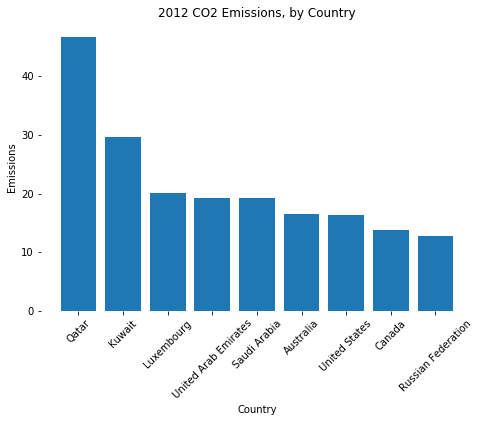

In [24]:
#Make a figure
fig = plt.figure()

#Add an axis
ax = fig.add_axes([0, 0, 1, 1])

#Use the bar() function to make the bar plot
ax.bar(range(len(countries)), emissions)

#Adjust the x-ticks
ax.set_xticks(range(len(countries)))
ax.set_xticklabels(countries, rotation=45)

#Put labels on the axes, and make a title
ax.set_xlabel('Country')
ax.set_ylabel('Emissions')
ax.set_title('2012 CO2 Emissions, by Country')

#Turn off the frame
ax.set_frame_on(False)
#Suppress some output, and show the plot
plt.show()

> Histogram
-----------

Another useful visualization is a histogram. We can make one using the ``hist()`` method of an ``Axes`` object. Below, we expand our view of the emissions information we plotted above, and look at 2012 CO2 emissions over all countries for which the World Bank had information.

In [25]:
#Load 2012 data from the data file
emissions = np.loadtxt('2012_emissions_data.txt')

As a sanity check, let's see how many entries are in this dataset:

In [26]:
len(emissions)

204

There are approximately 195 recognized countries in the world today, so this number is in the right ballpark. (It may include other sovereign entities which are not countries.)

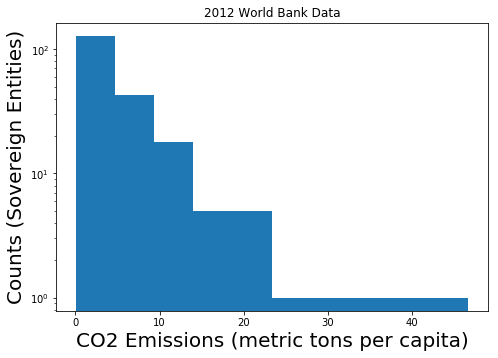

In [27]:
#Make a figure
fig = plt.figure()

#Add an axis
ax = fig.add_axes([0, 0, 1, 1])

#Use the ax.hist() function to make a histogram.
#NOTE: Adjust the range if need be.
ax.hist(emissions)

#Label the axes
ax.set_xlabel('CO2 Emissions (metric tons per capita)', fontsize=20)
ax.set_ylabel('Counts (Sovereign Entities)', fontsize=20)
ax.set_title('2012 World Bank Data')
#Change the y-scale to make the visualization a bit
#easier to understand.
ax.set_yscale('log')

plt.show()

Improving Figure Aesthetics
==============

> Using ``seaborn`` to change default aesthetics
-------------
(Explain ``import seaborn``, and how it overrides ``matplotlib`` defaults)

In [28]:
import seaborn

In [29]:
seaborn.__version__

'0.7.1'

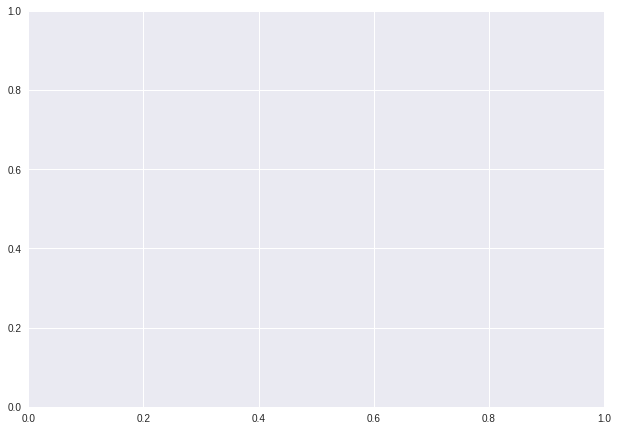

In [30]:
fig = plt.figure()
ax= fig.add_axes([0, 0, 1, 1])

> Choosing a Good Colormap with ``seaborn.color_palette``
--------------
http://seaborn.pydata.org/tutorial/color_palettes.html

* [Categorical Data](https://en.wikipedia.org/wiki/Categorical_variable)

Data is _categorical_ when it is related to a set of fixed classifications, or categories. For example, the US Census collects a substantial amount of categorical data about the US population.

Sometimes, we want to take numerical data and make sense of it as a function of some category. In the World Bank data set, we will look at CO2 emissions by country.

In this part of the lesson, we make use of the ``pandas`` library, which is intended to help researchers work with data, through the use of "dataframes" (think "tables"). In particular, ``pandas`` has a variety of ``read_X`` functions, which allow you to read CSV files, or even Excel files!

In [31]:
#Import pandas
import pandas as pd

In [32]:
#Read in worldwise_emissions.csv
df = pd.read_csv('worldwide_emissions.csv')

#Display the first few rows
df.head()

,Country Name,Year,emissions
0,China,1990,2.168
1,France,1990,6.420
2,Japan,1990,8.873
3,"Korea, Rep.",1990,5.760
4,United States,1990,19.323


Colormaps for categorical data should themselves not be distracting. In particular, if we use a color map which has substantial variation in the perceived brightness of the colors, then viewers of our plot will tend to focus more on that, than the data conveyed!

To that end, we make use of the ["HUSL" color map](http://www.boronine.com/2012/03/26/Color-Spaces-for-Human-Beings/). The perceived brightness of the colors doesn't change as we scan the colors, making this colormap great for categorical data.

Seaborn provides access to a function, ``color_palette``, which allows us to create a HUSL color palette with enough colors, one for each country in our dataframe.

One you have a color palette, you can use the `palplot` function to display it. (Great for checking that the colors are what you want!)

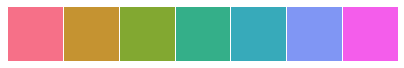

In [33]:
#Determine how many unique country names are in the dataframe
num_countries =len(df['Country Name'].unique())

#Make a HUSL color palette
colors = seaborn.color_palette('husl', n_colors=num_countries)

#Display the palette
seaborn.palplot(colors)

Now that we have the colors and the data, we are going to make a figure showing CO2 emissions over the years for each country in the dataset. 

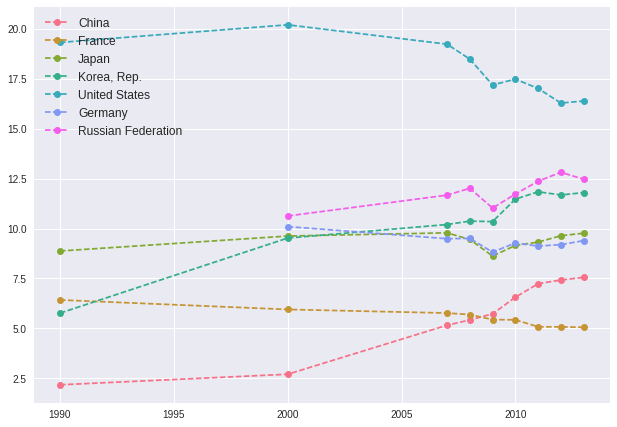

In [34]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

counter = 0
for c in df['Country Name'].unique():
    X = df[df['Country Name'] == c]['Year']
    Y = df[df['Country Name'] == c]['emissions']
    ax.plot(X, Y, color=colors[counter], ls='--', marker='o', clip_on=False, label=c)
    
    counter +=1
    
ax.legend(loc=0, fontsize=12)

* [Sequential Color Palette](http://www.personal.psu.edu/cab38/ColorSch/SchHTMLs/CBColorSeq.html)

A sequential color palette is useful when you have an ordering on numeric data, _and_ your data do not take both positive and negative values.

The plot above does a good job of using lines to indicate increases/decreases in CO2 emissions over time. However, because the amount of emisssions can never go below 0, it might make sense to plot this data in a different way, using a heatmap.

In [35]:
#Reshape the data, so that countries are now the vertical axis, and years the horizontal.
PT = df.pivot_table(index='Year', columns='Country Name', values='emissions').transpose()
PT

Year,1990,2000,2007,2008,2009,2010,2011,2012,2013
Country Name,,,,,,,,,
China,2.168,2.697,5.154,5.417,5.723,6.554,7.235,7.419,7.551
France,6.420,5.944,5.763,5.687,5.434,5.425,5.074,5.071,5.050
Germany,NaN,10.096,9.488,9.506,8.815,9.276,9.120,9.192,9.391
Japan,8.873,9.622,9.783,9.450,8.619,9.150,9.318,9.639,9.764
"Korea, Rep.",5.760,9.521,10.200,10.370,10.347,11.470,11.840,11.681,11.798
Russian Federation,NaN,10.627,11.672,12.015,11.024,11.726,12.368,12.818,12.467
United States,19.323,20.208,19.237,18.489,17.192,17.485,17.019,16.287,16.390


For this plot, we use seaborn's `cubehelix_palette` function to provide access to the cubehelix color map. Because later we'll be making a heatmap, which takes as input a matplotlib `colormap` object, we duplicate some code here to show the color palette, and then make the color map.

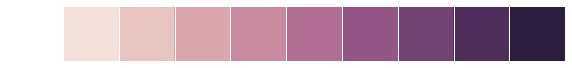

In [36]:
#Show the colors, by calling cubehelix_palette with as_cmap=False
colors = seaborn.cubehelix_palette(n_colors=10, light=1, as_cmap=False)
seaborn.palplot(colors)

In [37]:
#Duplicate the code above, but use as_cmap=True to get a colormap
cmap = seaborn.cubehelix_palette(n_colors=10, light=1, as_cmap=True)

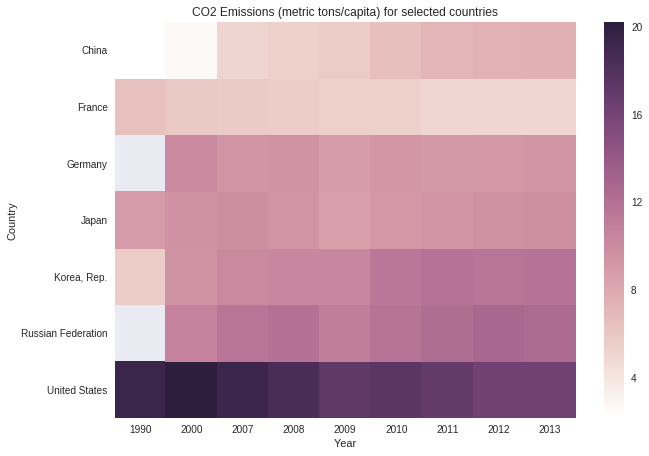

In [38]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
seaborn.heatmap(PT.as_matrix(), ax=ax, cmap=cmap)

ax.set_xticklabels(PT.columns)
ax.set_yticklabels(list(reversed(PT.index)), rotation=0)

ax.set_xlabel('Year')
ax.set_ylabel('Country')
ax.set_title('CO2 Emissions (metric tons/capita) for selected countries')
plt.show()

This plot allows us to more easily digest the fact that CO2 emissions have grown in China, Korea, and Russia, while those in the United States and France have decreased, while those in Germany and Japan have remained relatively constant.

* [Diverging Colormap](http://www.kennethmoreland.com/color-maps/)

A diverging colormap is good when your data takes positive and negative values relative to some reference value. (So, for example, the temperature relative to room temperature, or elevation relevative to sea level, are data sets where using a diverging colormap would be useful.)

The plot above shows each country's _absolute_ CO2 emissions. What if we wanted to look at, say, how much higher/lower they were relative to some reference country? In that case, a diverging colormap would be good.

In [39]:
#Pick a reference country
sub_country = 'Japan'

#Some pandas code which subtracts the values of
#sub_country from each element in the pivot table,
#while keeping the indexing correct.
sub_df = PT.sub(PT.ix[sub_country, :], axis=1)

sub_df

Year,1990,2000,2007,2008,2009,2010,2011,2012,2013
Country Name,,,,,,,,,
China,-6.705,-6.925,-4.629,-4.033,-2.896,-2.596,-2.083,-2.220,-2.213
France,-2.453,-3.678,-4.020,-3.763,-3.185,-3.725,-4.244,-4.568,-4.714
Germany,NaN,0.474,-0.295,0.056,0.196,0.126,-0.198,-0.447,-0.373
Japan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
"Korea, Rep.",-3.113,-0.101,0.417,0.920,1.728,2.320,2.522,2.042,2.034
Russian Federation,NaN,1.005,1.889,2.565,2.405,2.576,3.050,3.179,2.703
United States,10.450,10.586,9.454,9.039,8.573,8.335,7.701,6.648,6.626


For this plot, we use seaborn's `diverging_palette` function to choose a diverging colormap. Again, we need to re-call the code using ``as_cmap=True`` to get a colormap

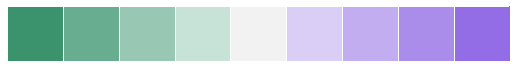

In [40]:
colors = seaborn.diverging_palette(150, 275, s=80, l=55, n=9)

seaborn.palplot(colors)

cmap = seaborn.diverging_palette(150, 275, s=80, l=55, n=9, as_cmap=True)

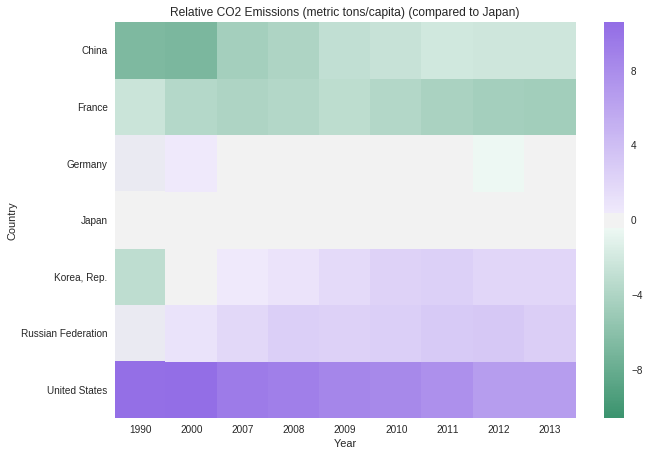

In [41]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
seaborn.heatmap(sub_df.as_matrix(), ax=ax, cmap=cmap)

ax.set_xticklabels(sub_df.columns)
ax.set_yticklabels(list(reversed(sub_df.index)), rotation=0)

ax.set_xlabel('Year')
ax.set_ylabel('Country')
ax.set_title('Relative CO2 Emissions (metric tons/capita) (compared to {0})'.format(sub_country))
plt.show()

What trends do you spot in CO2 emissions relative to the country you chose?

Sharing Your Figures
==========

While Jupyter notebooks are a great way to display and interact with code and data, sometimes you may find yourself needing to send a figure to your advisor, or put it in your paper. How do you get figures out of matplotlib, and into other file formats? We use the ``figure.savefig()`` method to do so. But first, we should take a look at some common file formats, and when it's appropriate to use them.

> Choosing a Good File Format
--------------

We've all seen it before - a figure which is pixellated, or doesn't quite look right. Such issues commonly arise from using the wrong file format. Some useful formats are:

* [Portable Document Format (PDF)](https://en.wikipedia.org/wiki/Portable_Document_Format)

 Everyone usually has some kind of pdf reader on their computer, making the pdf format useful when you want something "which just works".


* [Scalable Vector Graphics (SVG)](https://en.wikipedia.org/wiki/Scalable_Vector_Graphics)

    SVG is really nice when you want to make sure people can zoom in/out of your figure. This file format is supported by modern browsers. SVG is also stored as _text_, making it easy to parse SVG files using computer code.
    
* [Portable Network Graphics (PNG)](https://en.wikipedia.org/wiki/Portable_Network_Graphics)

    A lossless compression file type. Personally, I have never used it.

> Saving Figures with ``figure.savefig()``
------------

Once we've made a matplotlib ``Figure``, we can save it using the ``.savefig()`` function. One super-useful keyword argument is ``bbox_inches``, which controls how much of the figure matplotlib tries to save. When set to ``tight``, matplotlib attempts to find the tightest bounding box which contains all the elements of the figure.

In [44]:
#Save the figure from the previous section in pdf, svg, and png
fig.savefig('emissions.pdf', bbox_inches='tight')